# Mapping Stations with folium

In [219]:
import folium
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/P8105/p8105.github.io/master/data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
df.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.654490, -74.004499)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"


In [220]:
df.columns

Index(['Division', 'Line', 'Station Name', 'Station Latitude',
       'Station Longitude', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Route6', 'Route7', 'Route8', 'Route9', 'Route10', 'Route11',
       'Entrance Type', 'Entry', 'Exit Only', 'Vending', 'Staffing',
       'Staff Hours', 'ADA', 'ADA Notes', 'Free Crossover',
       'North South Street', 'East West Street', 'Corner', 'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location'],
      dtype='object')

In [221]:
df = df[['Division', 'Line', 'Station Name', 'Entry', 'Exit Only',
         'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location']]
df

,Division,Line,Station Name,Entry,Exit Only,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,YES,NaN,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,YES,NaN,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,36th St,YES,NaN,40.654490,-74.004499,"(40.655144, -74.003549)","(40.654490, -74.004499)"
3,BMT,4 Avenue,36th St,YES,NaN,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,YES,NaN,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
...,...,...,...,...,...,...,...,...,...
1863,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903597,-73.850360,"(40.903125, -73.85062)","(40.903597, -73.850360)"
1864,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903283,-73.850321,"(40.903125, -73.85062)","(40.903283, -73.850321)"
1865,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903509,-73.850124,"(40.903125, -73.85062)","(40.903509, -73.850124)"
1866,IRT,Flushing,34 St Hudson Yards,YES,NaN,40.754904,-74.001323,"(40.755882, -74.00191)","(40.754904, -74.001323)"


In [222]:
df1 = df[df['Exit Only'].isnull()]
print(len(df1))
df1

1812


,Division,Line,Station Name,Entry,Exit Only,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,YES,NaN,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,YES,NaN,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,36th St,YES,NaN,40.654490,-74.004499,"(40.655144, -74.003549)","(40.654490, -74.004499)"
3,BMT,4 Avenue,36th St,YES,NaN,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,YES,NaN,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
...,...,...,...,...,...,...,...,...,...
1863,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903597,-73.850360,"(40.903125, -73.85062)","(40.903597, -73.850360)"
1864,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903283,-73.850321,"(40.903125, -73.85062)","(40.903283, -73.850321)"
1865,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903509,-73.850124,"(40.903125, -73.85062)","(40.903509, -73.850124)"
1866,IRT,Flushing,34 St Hudson Yards,YES,NaN,40.754904,-74.001323,"(40.755882, -74.00191)","(40.754904, -74.001323)"


In [223]:
def str_to_coords(series):
    coords = []
    for s in series:
        coord = s[1:-1].strip(' ').split(',')
        coords.append(coord)
    return coords

In [224]:
coords = str_to_coords(df1['Station Location'].unique())
df1['Station Name']

0                  25th St
1                  25th St
2                  36th St
3                  36th St
4                  36th St
               ...        
1863    Wakefield-241st St
1864    Wakefield-241st St
1865    Wakefield-241st St
1866    34 St Hudson Yards
1867    34 St Hudson Yards
Name: Station Name, Length: 1812, dtype: object

In [225]:
import requests
topo = 'https://github.com/nychealth/coronavirus-data/blob/master/Geography-resources/MODZCTA_2010_WGS1984.topo.json'
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv')
geo_data = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json'

lat = 40.735
long = -74.0001

nyc_map = folium.Map([lat, long], zoom_start=12.5)
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    tiles='Stamen Toner',
    data=covid_data,
    columns=['MODIFIED_ZCTA', 'PERCENT_POSITIVE'],
    key_on='feature.properties.MODZCTA',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='COVID Case Rates'
).add_to(nyc_map)

folium.LayerControl().add_to(nyc_map)

nyc_map

In [226]:
#I used soem sample stations for now...

station_locations = {'42nd St-Port Authority': (40.7559, -73.9871),
 '14th St-Union Square': (40.7353, -73.9911),
 'Grand Central-42nd St': (40.7527, -73.9772),}

markers = []
for coordinates in station_locations.values():
    markers.append(folium.Marker(coordinates))

for marker in markers:
    marker.add_to(nyc_map)

In [227]:
nyc_map

In [228]:
import os

In [229]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv')
zcta_data = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json'
zcta = os.path.join('geoman.json')
covid_data.MODIFIED_ZCTA = covid_data.MODIFIED_ZCTA.astype(str)
covid_data

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,394,1672.11,23563.03,23,97.61,9.64,4087
1,10002,Chinatown/Lower East Side,Manhattan,1117,1455.27,76755.41,158,205.85,13.33,8382
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,481,894.03,53801.62,34,63.20,7.42,6484
3,10004,Financial District,Manhattan,33,903.96,3650.61,1,27.39,7.86,420
4,10005,Financial District,Manhattan,69,821.81,8396.11,2,23.82,7.14,967
...,...,...,...,...,...,...,...,...,...,...
172,11691,Edgemere/Far Rockaway,Queens,2495,3852.75,64759.02,362,559.00,20.85,11966
173,11692,Arverne/Edgemere,Queens,647,3215.67,20120.24,92,457.25,19.03,3400
174,11693,Arverne/Broad Channel,Queens,339,2738.01,12381.27,30,242.30,21.07,1609
175,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,747,3669.72,20355.78,86,422.48,21.76,3433


In [230]:
import matplotlib.pyplot as plt
covid_data.describe()

,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1166.531073,2381.092825,47425.734237,104.536723,206.643729,16.872768,6613.644068
std,831.226080,897.173040,26411.133886,83.050984,110.487937,5.555241,3821.878715
min,29.000000,634.180000,3457.770000,0.000000,0.000000,6.040000,420.000000
25%,541.000000,1693.790000,26614.420000,42.000000,134.720000,13.110000,3697.000000
50%,910.000000,2473.930000,43030.430000,81.000000,197.320000,17.840000,5889.000000
75%,1661.000000,3014.260000,67089.290000,147.000000,258.880000,21.470000,8918.000000
max,4790.000000,4555.400000,111594.100000,441.000000,708.910000,26.460000,19292.000000


(array([38., 52., 32., 22., 16., 12.,  3.,  1.,  0.,  1.]),
 array([  29. ,  505.1,  981.2, 1457.3, 1933.4, 2409.5, 2885.6, 3361.7,
        3837.8, 4313.9, 4790. ]),
 <a list of 10 Patch objects>)

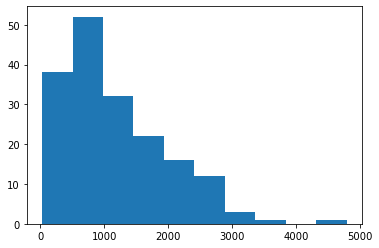

In [258]:
plt.hist(covid_data.COVID_CASE_COUNT)

In [259]:
covid_data.describe()


,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1166.531073,2381.092825,47425.734237,104.536723,206.643729,16.872768,6613.644068
std,831.226080,897.173040,26411.133886,83.050984,110.487937,5.555241,3821.878715
min,29.000000,634.180000,3457.770000,0.000000,0.000000,6.040000,420.000000
25%,541.000000,1693.790000,26614.420000,42.000000,134.720000,13.110000,3697.000000
50%,910.000000,2473.930000,43030.430000,81.000000,197.320000,17.840000,5889.000000
75%,1661.000000,3014.260000,67089.290000,147.000000,258.880000,21.470000,8918.000000
max,4790.000000,4555.400000,111594.100000,441.000000,708.910000,26.460000,19292.000000


In [240]:
sorted(df1['Station Name'].unique())

['103rd St',
 '104th St-102nd St',
 '104th St-Oxford Av',
 '110th St',
 '110th St-Central Park North',
 '111th St',
 '111th St-Greenwood Av',
 '116th St',
 '116th St-Columbia University',
 '121st St',
 '125th St',
 '135th St',
 '137th St-City College',
 '138th St',
 '138th St-3rd Ave',
 '145th St',
 '149th St-3rd Av',
 '149th St-Grand Concourse',
 '14th St',
 '14th St-Union Square',
 '155th St',
 '157th St',
 '163rd St - Amsterdam Av',
 '167th St',
 '168th St',
 '168th St - Washington Heights',
 '169th St',
 '170th St',
 '174-175th Sts',
 '174th St',
 '175th St',
 '176th St',
 '181st St',
 '182nd-183rd Sts',
 '183rd St',
 '18th Av',
 '18th St',
 '190th St',
 '191st St',
 '1st Av',
 '207th St',
 '20th Av',
 '215th St',
 '219th St',
 '21st St',
 '225th St',
 '231st St',
 '233rd St',
 '238th St',
 '238th St-Nereid Av',
 '23rd St',
 '23rd St-Ely Av',
 '25th Av',
 '25th St',
 '28th St',
 '2nd Av',
 '30 Av-Grand Av',
 '33rd St',
 '34 St Hudson Yards',
 '34th St',
 '36 Av-Washington Av',
 '36

In [256]:
covid_data

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,394,1672.11,23563.03,23,97.61,9.64,4087
1,10002,Chinatown/Lower East Side,Manhattan,1117,1455.27,76755.41,158,205.85,13.33,8382
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,481,894.03,53801.62,34,63.20,7.42,6484
3,10004,Financial District,Manhattan,33,903.96,3650.61,1,27.39,7.86,420
4,10005,Financial District,Manhattan,69,821.81,8396.11,2,23.82,7.14,967
...,...,...,...,...,...,...,...,...,...,...
172,11691,Edgemere/Far Rockaway,Queens,2495,3852.75,64759.02,362,559.00,20.85,11966
173,11692,Arverne/Edgemere,Queens,647,3215.67,20120.24,92,457.25,19.03,3400
174,11693,Arverne/Broad Channel,Queens,339,2738.01,12381.27,30,242.30,21.07,1609
175,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,747,3669.72,20355.78,86,422.48,21.76,3433


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1273bfe20>]],
      dtype=object)

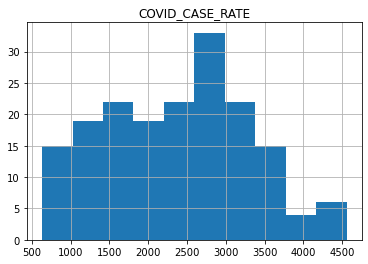

In [257]:
covid_data.hist('COVID_CASE_RATE')

In [250]:
import numpy as np
myscale = (covid_data['COVID_CASE_COUNT'].quantile((0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1))).tolist()
myscale

[29.0, 339.0, 541.0, 699.0, 910.0, 1286.0, 1661.0, 2192.0, 4790.0]

In [251]:
lat = 40.735
long = -74.0001

nyc_map = folium.Map([lat, long], zoom_start=11.5)
folium.Choropleth(
    geo_data=zcta_data,
    name='choropleth',
    tiles='Stamen',
    data=covid_data,
    columns=['MODIFIED_ZCTA', 'COVID_CASE_COUNT'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd',
    threshold_scale=myscale,
    fill_opacity=0.85,
    line_opacity=0.3,
    legend_name='COVID Case Rates',
    smooth_factor=0
    ).add_to(nyc_map)

folium.LayerControl().add_to(nyc_map)

nyc_map

In [247]:
station_locations = {'42nd St-Port Authority': (40.7559, -73.9871), 
 '14th St-Union Square': (40.7353, -73.9911),
 'Grand Central-42nd St': (40.7527, -73.9772),
 '47-50th Sts Rockefeller Center': (40.7588, -73.9812),
 'Howard Beach-JFK': (40.6605, -73.8303)}

markers = []
for coordinates in station_locations.values():
    markers.append(folium.Marker(coordinates))

for marker in markers:
    marker.add_to(nyc_map)

In [248]:
nyc_map